# Задача 5.2

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#так как элементы разных выборок идут подряд:
num_elements = np.array([(data.target == i).sum() for i in range(3)])
sample = np.array([data.data[num_elements.cumsum()[i] - num_elements[i]:num_elements.cumsum()[i]] for i in range(3)])

# Оценка параметров распределений

Рассмотрим модель смеси гауссовских распределений
$$p(x) = \sum_{k=1}^K p_k(x)\cdot P(T = k),$$ где Т - номер компоненты смеси, а $p_k(x)$ - плотность распределения $N(a_k, \Sigma_k)$

Оценим параметры выборок. Для распределения $N(a, \Sigma)$:    $\hat{a} = \overline{X}$, оценка для $\Sigma$ - $\frac{1}{n} X^{T}X $:

$a_1, a_2, a_3$:

In [7]:
a = np.array([sample[i].mean(axis=0) for i in range(3)])
print a

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]


In [8]:
def cov_matrix_estimation(sample):
    X = sample - sample.mean(axis = 0)
    return np.dot(X.T, X) /  float(sample.shape[0])

Матрицы ковариаций $\Sigma_1, \Sigma_2, \Sigma_3:$

In [9]:
cov_matrix = np.array([cov_matrix_estimation(sample[i]) for i in range(3)])
print cov_matrix

[[[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]

 [[ 0.261104  0.08348   0.17924   0.054664]
  [ 0.08348   0.0965    0.081     0.04038 ]
  [ 0.17924   0.081     0.2164    0.07164 ]
  [ 0.054664  0.04038   0.07164   0.038324]]

 [[ 0.396256  0.091888  0.297224  0.048112]
  [ 0.091888  0.101924  0.069952  0.046676]
  [ 0.297224  0.069952  0.298496  0.047848]
  [ 0.048112  0.046676  0.047848  0.073924]]]


# Плотности компонент смеси

Для пар координат (0, 1), (1, 2), (2, 3) найдём плотность каждой компоненты смеси. Построим графики плотностей для каждой пары координат:

In [10]:
from mpl_toolkits.mplot3d import Axes3D

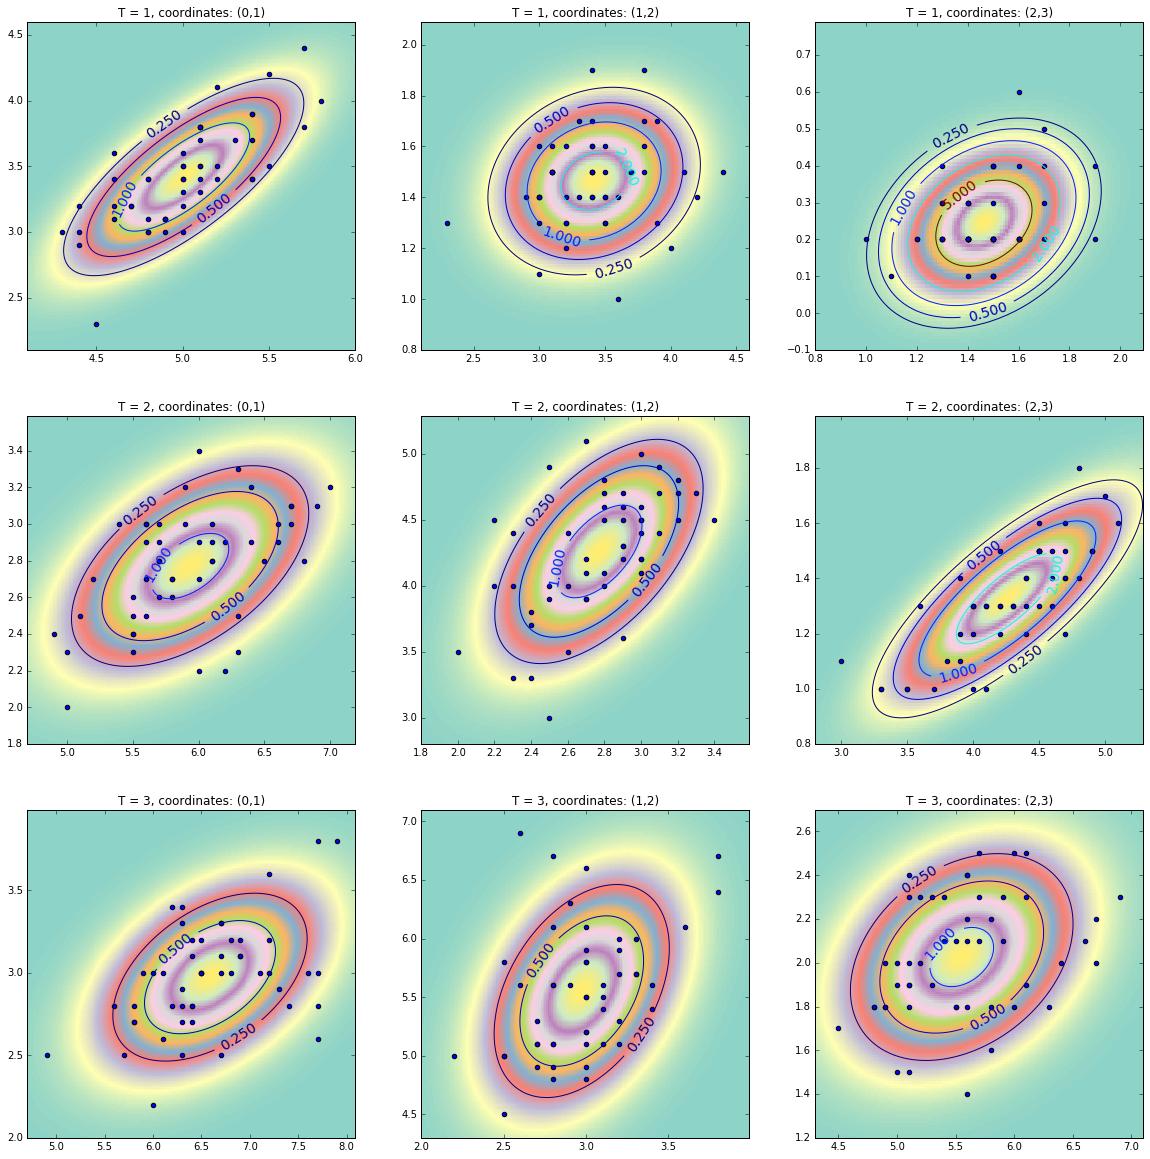

In [11]:
coordinates = np.array([[0,1], [1, 2], [2, 3]])
plt.figure(figsize=(20, 20))
for i in range(3):
    for j in range(3):
        grid = np.mgrid[sample[i][:, coordinates[j][0]].min() - 0.2:sample[i][:, coordinates[j][0]].max() + 0.2:0.01, 
                        sample[i][:, coordinates[j][1]].min() - 0.2:sample[i][:, coordinates[j][1]].max() + 0.2:0.01]
        density = np.array([[sps.multivariate_normal.pdf((grid[0, k, l], grid[1, k, l]), mean=a[:, coordinates[j]][i],
                                 cov=cov_matrix[i][coordinates[j], :][:, coordinates[j]])
                                 for l in range(grid[0].shape[1])]
                                 for k in range(grid[0].shape[0])])
        subplot(3, 3, 3 * i + j + 1)
        plt.pcolormesh(grid[0], grid[1], density, cmap='Set3')  # закрасить с интенсивностью density, cmap - цветовая схема
        plt.scatter(sample[i][:, coordinates[j][0]], sample[i][:, coordinates[j][1]])
        CS = plt.contour(grid[0], grid[1], density, [0.25, 0.5, 1, 2, 5])  # нарисовать указанные линии уровня
        plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
        plt.xlim((np.min(grid[0]), np.max(grid[0])))
        plt.ylim((np.min(grid[1]), np.max(grid[1])))
        plt.title('T = ' + str(i + 1) + ', coordinates: (' + str(coordinates[j][0]) + ',' + str(coordinates[j][1]) + ')')
plt.show()

Найдём вероятности $P(T = k)$ частотами вхождений k-ых компонент смеси в выборку:

In [20]:
for i in range(3):
    print sample[i].shape[0]/float(data.data.shape[0])

0.333333333333
0.333333333333
0.333333333333
